<a href="https://colab.research.google.com/github/ss-shrishi2000/handwritten-digit-classification/blob/main/handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
downloaded = drive.CreateFile({'id':'1botJS1K3yidi_02fbrwxwPDMB5pzQoqQ'}) # replace the id with id of file you want to access
downloaded.GetContentFile('mnist_train.csv') 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('mnist_train.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [22]:
def knn(x, y, queryPoint, k=5):
    vals = []
    m = x.shape[0]
    for i in range(m):
        d = dist(queryPoint, x[i])
        vals.append((d, y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:, 1], return_counts = True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [15]:
df.shape

(60000, 785)

In [7]:
df = pd.read_csv('mnist_train.csv')
data = np.array(df)

In [8]:
data

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [9]:
# pixels
x = data[:, 1:]
# label
y = data[:, 0]

print(x.shape, y.shape)

(60000, 784) (60000,)


In [10]:
label = data[:, 0]

In [22]:
label

array([5, 0, 4, ..., 5, 6, 8])

In [11]:
split = 50000
x_train = x[:split, :]
x_test = x[split:, :]

y_train = y[:split]
y_test = y[split:]

print("Training data shape : ",x_train.shape, y_train.shape)
print("Testing data shape : ",x_test.shape, y_test.shape)

Training data shape :  (50000, 784) (50000,)
Testing data shape :  (10000, 784) (10000,)


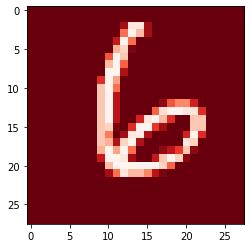

In [19]:
def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='Reds_r')
    plt.show()

drawImg(x_test[108])

In [24]:
Prediction = knn(x_train, y_train, x_test[108])
print(int(Prediction))

6


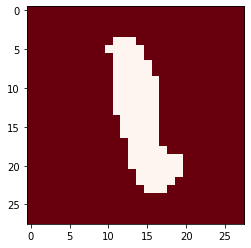

In [25]:
def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='Reds_r')
    plt.show()

drawImg(x_test[16])

In [26]:
Prediction = knn(x_train, y_train, x_test[16])
print(int(Prediction))

1


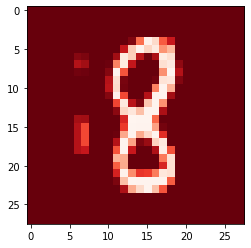

In [29]:
def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='Reds_r')
    plt.show()

drawImg(x_test[35])

In [27]:
Prediction = knn(x_train, y_train, x_test[35])
print(int(Prediction))

8


In [ ]:
len1 = (y_test.shape[0])
corr_pred = 0.0
prediction = []
for i in range (len1):
    pred = knn(x_train, y_train, x_test[i])
    if pred == y_test[i]:
        corr_pred = corr_pred + 1

# accuracy = correct_predictions/total_predictions
accuracy = corr_pred/len1

print(f"Accuracy of model : {accuracy}")

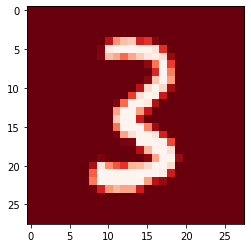

Label : 3.0




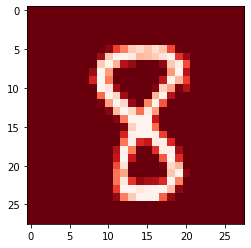

Label : 8.0




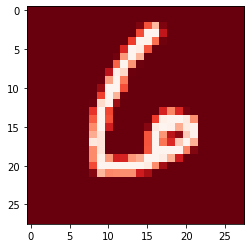

Label : 6.0




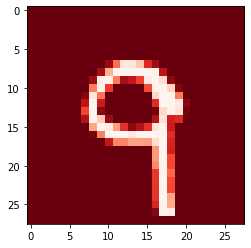

Label : 9.0




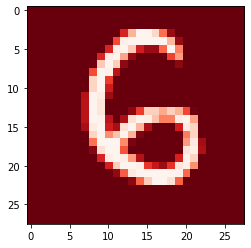

Label : 6.0




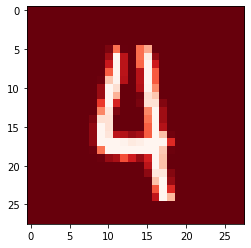

Label : 4.0




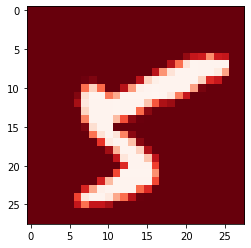

Label : 5.0




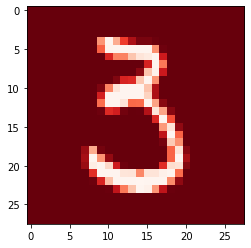

Label : 3.0




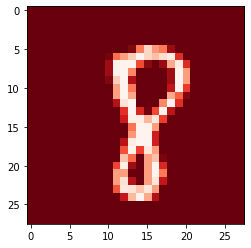

Label : 8.0




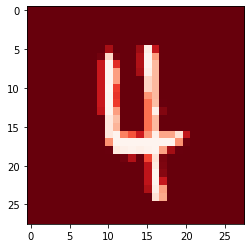

Label : 4.0




In [31]:
for i in range(10):
    label = knn(x_train, y_train, x_test[i])
    drawImg(x_test[i])
    print(f"Label : {label}\n\n")